In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Chapter06DataSet.csv")

In [ ]:
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([3, 3, 3, 1, 1, 0, 3, 2, 0, 0, 3, 0, 3, 2, 1, 0, 3, 0, 2, 1, 2, 3,
       0, 1, 3, 0, 3, 0, 0, 2, 0, 1, 2, 3, 0, 3, 0, 3, 1, 2, 0, 2, 1, 0,
       0, 1, 0, 1, 1, 3, 3, 2, 0, 2, 3, 2, 2, 0, 1, 2, 3, 2, 3, 0, 1, 2,
       3, 2, 0, 1, 1, 1, 1, 2, 0, 3, 1, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 1,
       1, 3, 2, 0, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 1, 0, 0, 3, 2, 3, 0,
       1, 0, 1, 3, 0, 3, 1, 1, 2, 1, 0, 3, 2, 0, 0, 3, 0, 3, 2, 1, 0, 3,
       0, 2, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 0, 3, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 3, 1, 2, 0, 2, 3, 0, 2, 0, 1, 2, 3,
       2, 3, 0, 2, 2, 3, 2, 0, 1, 1, 1, 1, 2, 0, 3, 1, 0, 3, 1, 1, 3, 0,
       1, 3, 1, 2, 2, 1, 3, 2, 0, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 1, 0,
       0, 1, 2, 3, 0, 1, 0, 1, 3, 0, 3, 1, 1, 2, 1, 0, 3, 2, 0, 0, 3, 0,
       3, 2, 1, 0, 3, 0, 2, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0, 2, 0, 2, 2, 3,
       0, 3, 0, 3, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 0, 2, 3, 2,
       2, 0, 1, 2, 3, 2, 3, 0, 2, 2, 3, 2, 0, 1, 1,

In [ ]:
df["label"] = kmeans.labels_

In [ ]:
df.columns

Index(['Weight', 'Cholesterol', 'Gender', 'label'], dtype='object')

In [ ]:
cluster_0 = df[df.label == 0]
cluster_1 = df[df.label == 1]
cluster_2 = df[df.label == 2]
cluster_3 = df[df.label == 3]

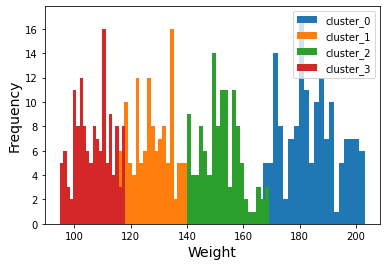

In [ ]:
plt.hist(cluster_0["Weight"],bins=20, label="cluster_0")
plt.hist(cluster_1["Weight"],bins=20, label="cluster_1")
plt.hist(cluster_2["Weight"],bins=20, label="cluster_2")
plt.hist(cluster_3["Weight"],bins=20, label="cluster_3")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['Weight', 'Cholesterol', 'Gender', 'label'], dtype='object')

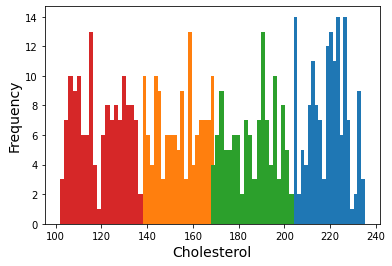

In [ ]:
plt.hist(cluster_0["Cholesterol"],bins=20, label="cluster_0")
plt.hist(cluster_1["Cholesterol"],bins=20, label="cluster_1")
plt.hist(cluster_2["Cholesterol"],bins=20, label="cluster_2")
plt.hist(cluster_3["Cholesterol"],bins=20, label="cluster_3")
plt.xlabel("Cholesterol", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

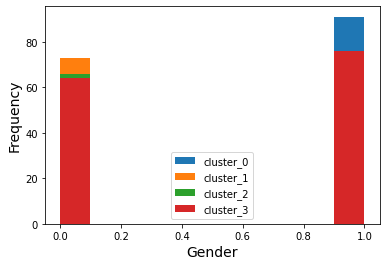

In [ ]:
plt.hist(cluster_0["Gender"], label="cluster_0")
plt.hist(cluster_1["Gender"], label="cluster_1")
plt.hist(cluster_2["Gender"], label="cluster_2")
plt.hist(cluster_3["Gender"], label="cluster_3")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()

### Classification

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [60]:
df = pd.read_csv("/content/Chapter09DataSet_Training.csv")

In [97]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

enc = OrdinalEncoder()
y = enc.fit_transform(y.reshape(-1,1))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [99]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [104]:
accuracy_score,
y_pred = log.predict(X_test)
accuracy_score(y_pred, y_test)

0.9285714285714286